<a href="https://colab.research.google.com/github/rrgalvan/nnpde/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
# En este caso, fijamos semilfa pseudoaleatoria para tener resultados deterministas
np.random.seed(100)
tf.random.set_seed(100)

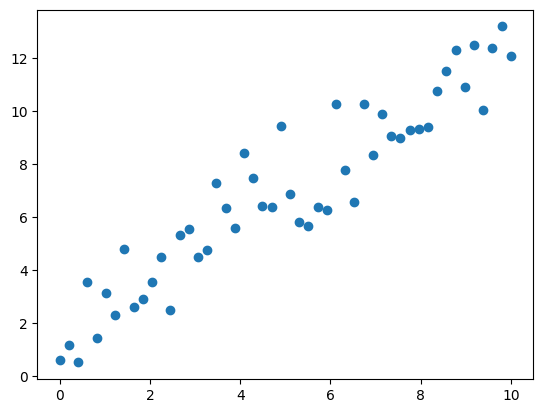

In [ ]:
# Definimos nube de puntos de entrenamiento

a, b = 0, 10
N_data = 50
x_train = np.linspace(a, b, N_data)
y_train = x_train + 5*tf.random.uniform(shape=(N_data,))

plt.plot(x_train, y_train, 'o')

In [ ]:
# Definimos una red neuronal básica, densa y secuencial
model = Sequential()

# Define the model consisting of a single layer composed by an unique
# neuron,  $x \in R^1 -> y \in \R^1$
model.add(Dense(units=16, input_shape=(1,)))

# Display a summary of the model architecture:
# única capa con una neurona $\sigma(wx+b)$, $w$, $b$ parámetros
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compile the Model, using an algorithm for gradient descent
# En este caso, RMSprop.
# MSE = funcional de coste
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=.005),
              loss='mse')

In [ ]:
# Training of the neuron network
# Epochs -> iteraciones de gradiente
history = model.fit(x_train,
                    y_train,
                    batch_size=16,
                    epochs=100,
                    validation_split=0.3)

Epoch 1/100
3/3 [==============================] - 0s 53ms/step - loss: 14.9250 - val_loss: 25.5570
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 13.8619 - val_loss: 23.4409
Epoch 3/100
3/3 [==============================] - 0s 11ms/step - loss: 13.1279 - val_loss: 21.8106
Epoch 4/100
3/3 [==============================] - 0s 12ms/step - loss: 12.5358 - val_loss: 20.2502
Epoch 5/100
3/3 [==============================] - 0s 12ms/step - loss: 11.9738 - val_loss: 19.1364
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 11.5493 - val_loss: 18.0692
Epoch 7/100
3/3 [==============================] - 0s 10ms/step - loss: 11.1322 - val_loss: 16.9859
Epoch 8/100
3/3 [==============================] - 0s 10ms/step - loss: 10.7056 - val_loss: 15.7698
Epoch 9/100
3/3 [==============================] - 0s 10ms/step - loss: 10.2482 - val_loss: 14.8666
Epoch 10/100
3/3 [==============================] - 0s 14ms/step - loss: 9.8862 - val_loss: 14.0012


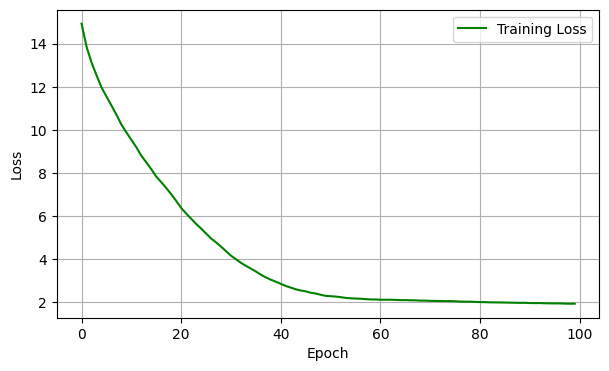

In [ ]:
def plot_loss(history):
  """Dibuja el historial de minimización de la función de cose o pérdida"""
  fig, ax = plt.subplots(figsize=(7,4))
  ax.plot(history.history['loss'], 'g', label='Training Loss')
  #ax.plot(history.history['val_loss'], 'b', label='Validation Loss')
  ax.set_xlabel('Epoch')
  ax.set_ylabel('Loss')
  ax.legend()
  ax.grid()

plot_loss(history)

In [ ]:
# Predecimos nuevos valores (calculamos f_NN(x))
x = [1.5, 8.9]
y = model.predict(x)
y

1/1 [==============================] - 0s 23ms/step


array([[ 3.1057055],
       [13.021507 ]], dtype=float32)

1/1 [==============================] - 0s 22ms/step


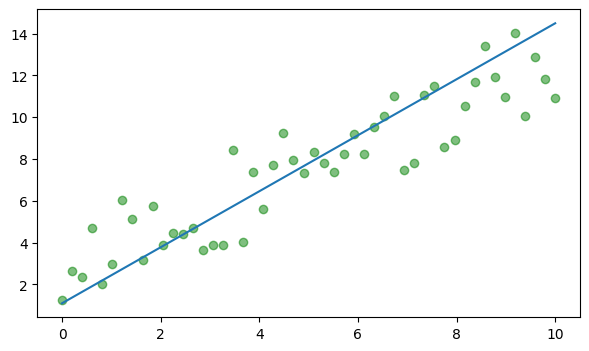

In [ ]:
# Plot the Model and the Data ("Plot f_NN(x)")
x = tf.linspace(a, b, 20)
y = model.predict(x)  # y = f_NN(x)


fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x, y, "-")
ax.scatter(x_train, y_train, label='Puntos entrenamiento', color='green', alpha=0.5)
